# 🌍 EU27 vs ABD: Kapsamlı Enerji Politikaları Analizi

Bu notebook, OWID verileri kullanılarak EU27 ve ABD'nin nükleer ve yenilenebilir enerji kullanımını kapsamlı olarak analiz eder.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

print("✅ Libraries loaded!")

✅ Libraries loaded!


In [2]:
# Load data
data_path = Path.cwd().parent / 'data' / 'processed' / 'eu_us_energy.csv'
df = pd.read_csv(data_path)
df['year'] = pd.to_numeric(df['year'], errors='coerce')
df = df.dropna(subset=['year'])

print(f"📊 Data loaded: {len(df)} records")
print(f"📅 Year range: {df['year'].min():.0f} - {df['year'].max():.0f}")
df.head()

📊 Data loaded: 250 records
📅 Year range: 1900 - 2024


,region,year,nuclear_share_energy,renewables_share_energy,fossil_share_energy,low_carbon_share_energy,primary_energy_consumption
0,EU27,1900,NaN,NaN,NaN,NaN,NaN
1,EU27,1901,NaN,NaN,NaN,NaN,NaN
2,EU27,1902,NaN,NaN,NaN,NaN,NaN
3,EU27,1903,NaN,NaN,NaN,NaN,NaN
4,EU27,1904,NaN,NaN,NaN,NaN,NaN


## 📊 1. Nükleer Enerji Trendi Analizi

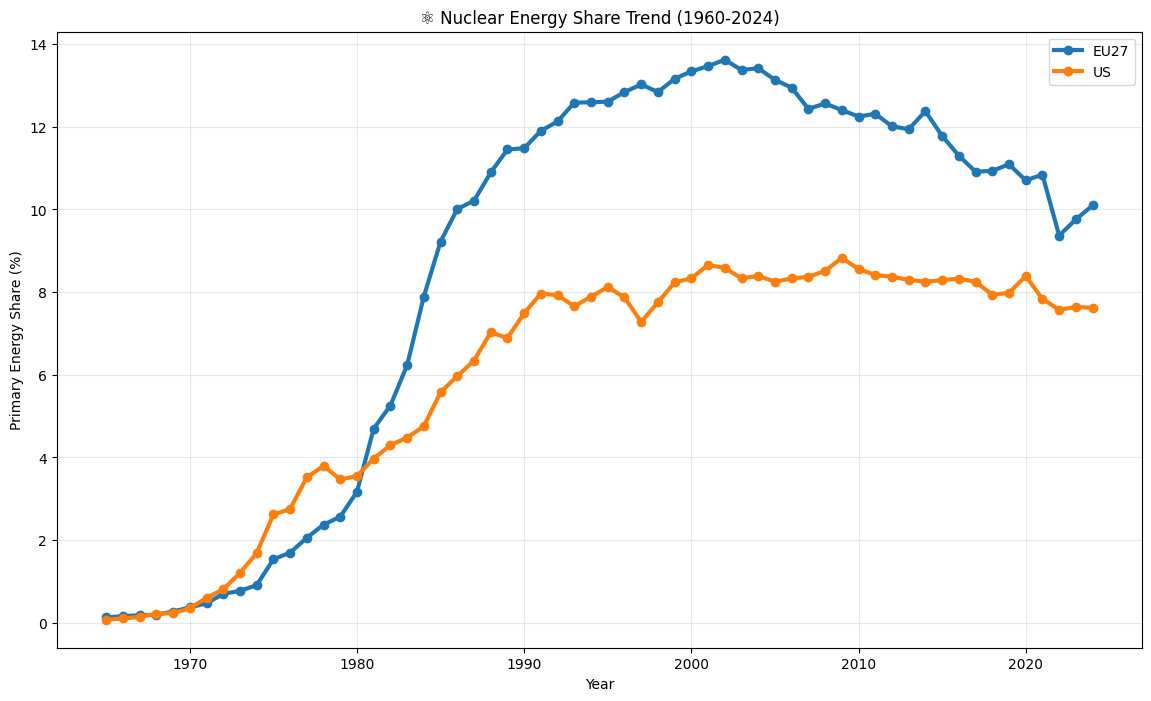

In [3]:
# Nuclear energy trends
fig, ax = plt.subplots(figsize=(14, 8))

for region in ['EU27', 'US']:
    data = df[df['region'] == region]
    ax.plot(data['year'], data['nuclear_share_energy'], linewidth=3, marker='o', label=region)

ax.set_title('⚛️ Nuclear Energy Share Trend (1960-2024)')
ax.set_ylabel('Primary Energy Share (%)')
ax.set_xlabel('Year')
ax.legend()
ax.grid(True, alpha=0.3)
plt.show()

## 🌱 2. Yenilenebilir Enerji Gelişimi

/home/zeynep/Energy/energy_nukleer_et_solar_wind/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127793 (\N{SEEDLING}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


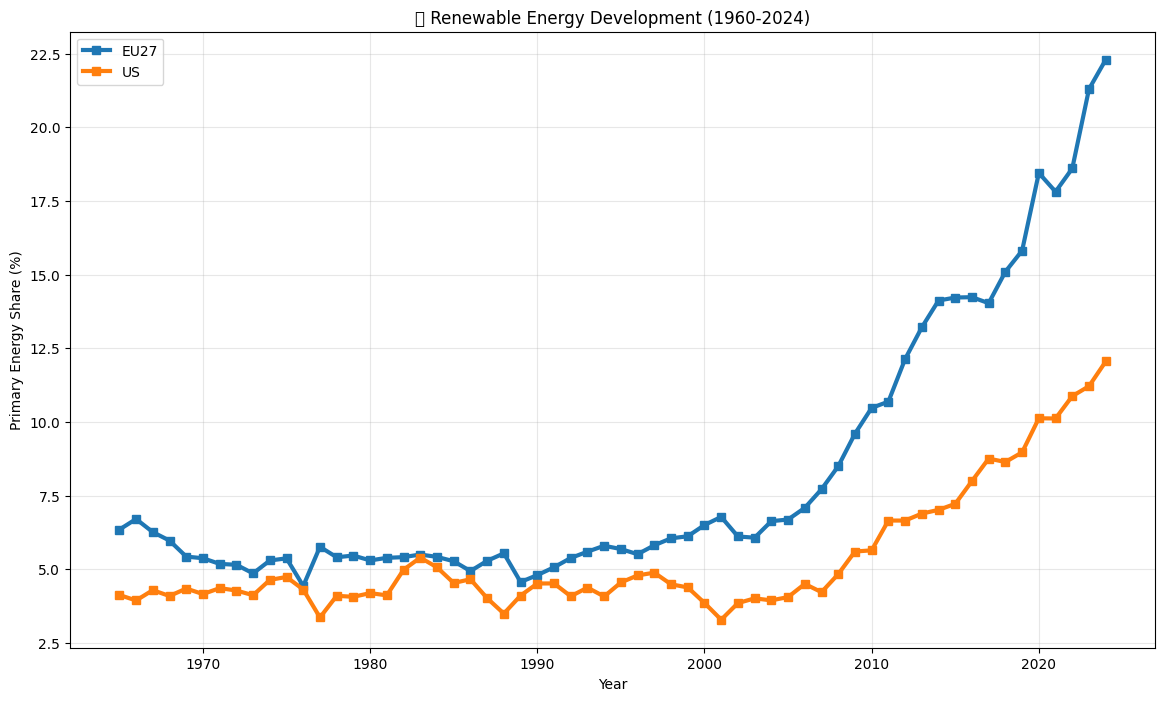

In [4]:
# Renewable energy development
fig, ax = plt.subplots(figsize=(14, 8))

for region in ['EU27', 'US']:
    data = df[df['region'] == region]
    ax.plot(data['year'], data['renewables_share_energy'], linewidth=3, marker='s', label=region)

ax.set_title('🌱 Renewable Energy Development (1960-2024)')
ax.set_ylabel('Primary Energy Share (%)')
ax.set_xlabel('Year')
ax.legend()
ax.grid(True, alpha=0.3)
plt.show()

## 📊 3. 2024 Enerji Karışımı Karşılaştırması

/tmp/ipykernel_661848/1277364944.py:40: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/zeynep/Energy/energy_nukleer_et_solar_wind/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


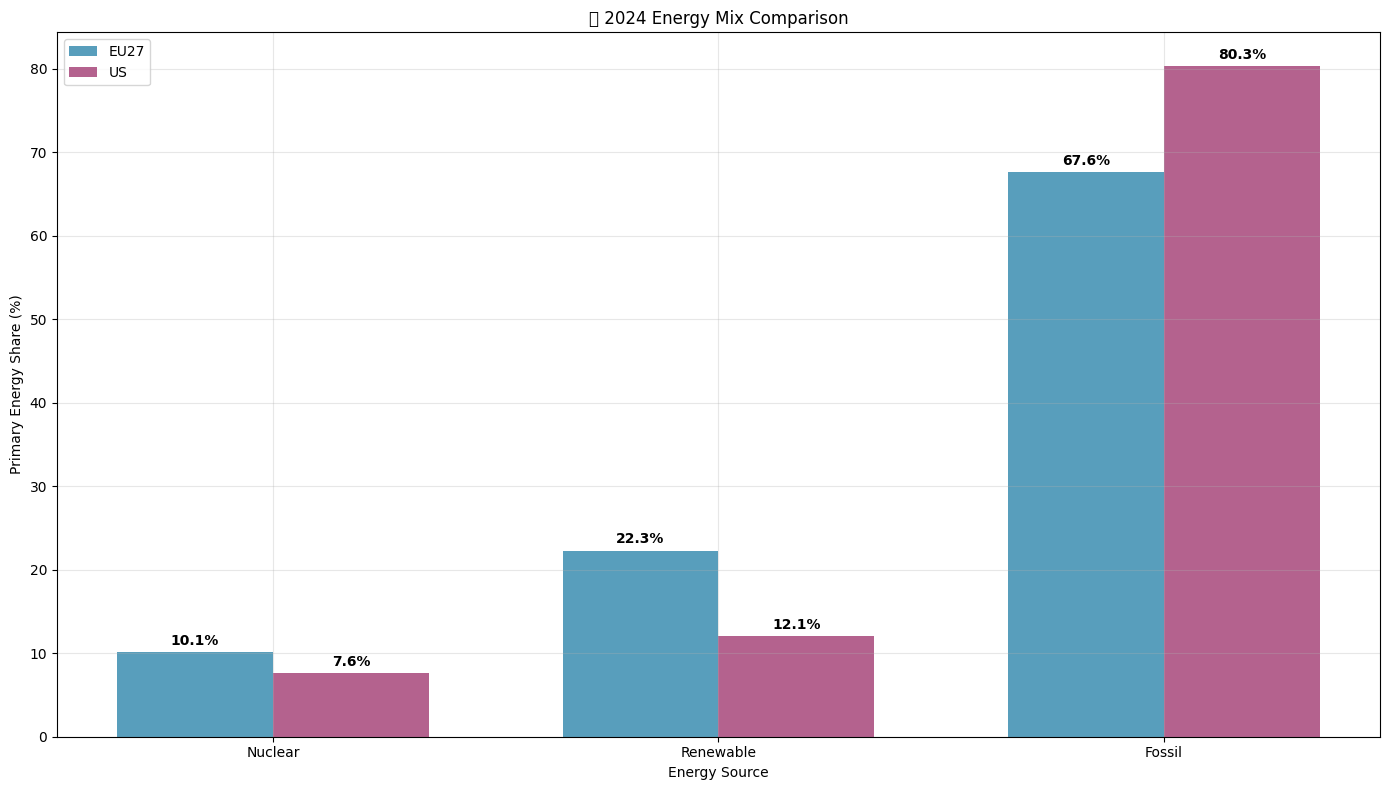

In [5]:
# 2024 energy mix comparison
latest_data = df[df['year'] == 2024]

categories = ['Nuclear', 'Renewable', 'Fossil']
eu_values = [
    latest_data[latest_data['region'] == 'EU27']['nuclear_share_energy'].iloc[0],
    latest_data[latest_data['region'] == 'EU27']['renewables_share_energy'].iloc[0],
    latest_data[latest_data['region'] == 'EU27']['fossil_share_energy'].iloc[0]
]
us_values = [
    latest_data[latest_data['region'] == 'US']['nuclear_share_energy'].iloc[0],
    latest_data[latest_data['region'] == 'US']['renewables_share_energy'].iloc[0],
    latest_data[latest_data['region'] == 'US']['fossil_share_energy'].iloc[0]
]

fig, ax = plt.subplots(figsize=(14, 8))
x = np.arange(len(categories))
width = 0.35

bars1 = ax.bar(x - width/2, eu_values, width, label='EU27', color='#2E86AB', alpha=0.8)
bars2 = ax.bar(x + width/2, us_values, width, label='US', color='#A23B72', alpha=0.8)

ax.set_title('📊 2024 Energy Mix Comparison')
ax.set_ylabel('Primary Energy Share (%)')
ax.set_xlabel('Energy Source')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()
ax.grid(True, alpha=0.3)

# Write values on bars
for bar in bars1:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.5, f'{height:.1f}%', ha='center', va='bottom', fontweight='bold')

for bar in bars2:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.5, f'{height:.1f}%', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

## 📋 4. İstatistiksel Özet

In [8]:
# Statistical summary
latest_data = df[df['year'] == 2024]

print("📊 2024 YEAR STATISTICS")
print("=" * 50)

for region in ['EU27', 'US']:
    region_data = latest_data[latest_data['region'] == region]
    print(f"🌍 {region}:")
    print(f"   Nuclear Energy: {region_data['nuclear_share_energy'].iloc[0]:.1f}%")
    print(f"   Renewable: {region_data['renewables_share_energy'].iloc[0]:.1f}%")
    print(f"   Low Carbon: {region_data['low_carbon_share_energy'].iloc[0]:.1f}%")
    print(f"   Fossil Fuel: {region_data['fossil_share_energy'].iloc[0]:.1f}%")

📊 2024 YEAR STATISTICS
🌍 EU27:
   Nuclear Energy: 10.1%
   Renewable: 22.3%
   Low Carbon: 32.4%
   Fossil Fuel: 67.6%
🌍 US:
   Nuclear Energy: 7.6%
   Renewable: 12.1%
   Low Carbon: 19.7%
   Fossil Fuel: 80.3%
